## Aplicação e interpretação de testes estatísticos para analisar a ataxa de ocupação de imóveis
Projeto com ênfase na modelagem estatística com objetivo de analisar os dados e verificar  quais fatores influenciam a taxa de ocupação de imóveis em bairros de uma cidade usando métodos paramétricos.

Problema:
**Quais fatores mais influenciam na taxa de ocupação de imóveis?**

### Bibliotecas utilizadas

In [7]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### Leitura dos dados

In [12]:
dados = pd.read_csv('/home/priscila/Downloads/1-Mat/dados/dataset_imoveis.csv')
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

In [13]:
dados_originais = dados.copy()

#### Resumo estatístico

In [15]:
dados.describe()    

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006340,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Análise da variável alvo (taxa_ocupacao)

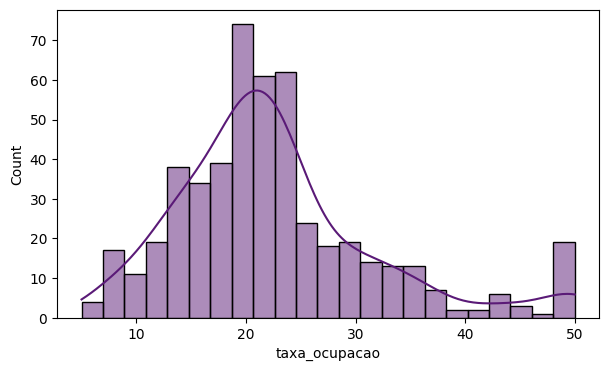

In [ ]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao, kde = True, color = "#5A1A77")
plt.show()

#### Assimetria das variáveis

Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. <br> 
Um valor entre 0,5 e 1 ou -0,5 e -1 é moderadamente distorcido. <br>
Um valor entre -0,5 e 0,5 indica que a distribuição é bastante simétrica.

In [18]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
dtype: float64

In [19]:
# Transformação de log
dados['taxa_ocupacao_log'] = np.log(dados['taxa_ocupacao'])

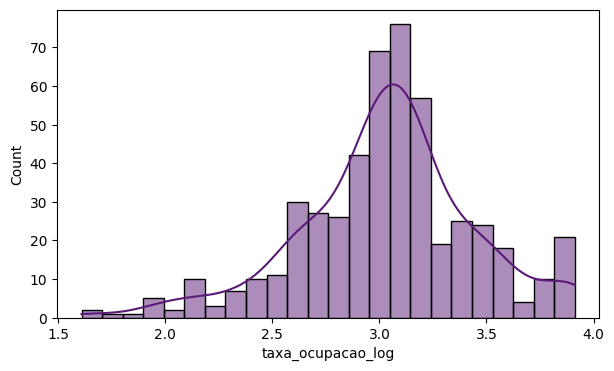

In [21]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao_log, kde = True, color = "#5A1A77")
plt.show()

In [22]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
taxa_ocupacao_log                     -0.332872
dtype: float64

#### Correlação

In [23]:
dados.corr()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.243044,-0.218919,0.314221,-0.393012,0.092122,-0.303151,0.208031,-0.208559,-0.291159,-0.362163,0.127517,-0.613654,0.696424,0.632340
idade_media_residencias,-0.243044,1.000000,0.355852,-0.568654,0.645526,0.088155,0.731859,-0.747426,0.463883,0.512673,0.258119,-0.276578,0.608452,-0.376758,-0.454326
taxa_criminalidade,-0.218919,0.355852,1.000000,-0.203363,0.407351,-0.057316,0.422339,-0.384391,0.624880,0.581835,0.297472,-0.383776,0.454628,-0.390960,-0.530713
proporcao_lotes,0.314221,-0.568654,-0.203363,1.000000,-0.534292,-0.044375,-0.516414,0.663235,-0.319191,-0.320072,-0.388901,0.178462,-0.417814,0.359733,0.363476
proporcao_empresas,-0.393012,0.645526,0.407351,-0.534292,1.000000,0.063174,0.763810,-0.709502,0.599156,0.724065,0.384794,-0.357710,0.606354,-0.484606,-0.542907
rio_no_bairro,0.092122,0.088155,-0.057316,-0.044375,0.063174,1.000000,0.091835,-0.101685,-0.010326,-0.037972,-0.119013,0.050259,-0.055847,0.174606,0.158163
taxa_poluicao,-0.303151,0.731859,0.422339,-0.516414,0.763810,0.091835,1.000000,-0.770068,0.616414,0.671652,0.188255,-0.381440,0.593524,-0.427432,-0.511366
distancia_centro,0.208031,-0.747426,-0.384391,0.663235,-0.709502,-0.101685,-0.770068,1.000000,-0.505664,-0.543241,-0.226258,0.296059,-0.504135,0.248688,0.343079
index_acessibilidade,-0.208559,0.463883,0.624880,-0.319191,0.599156,-0.010326,0.616414,-0.505664,1.000000,0.909742,0.482377,-0.442594,0.485830,-0.387305,-0.487378
imposto_residencial,-0.291159,0.512673,0.581835,-0.320072,0.724065,-0.037972,0.671652,-0.543241,0.909742,1.000000,0.475243,-0.440226,0.541711,-0.473117,-0.565867


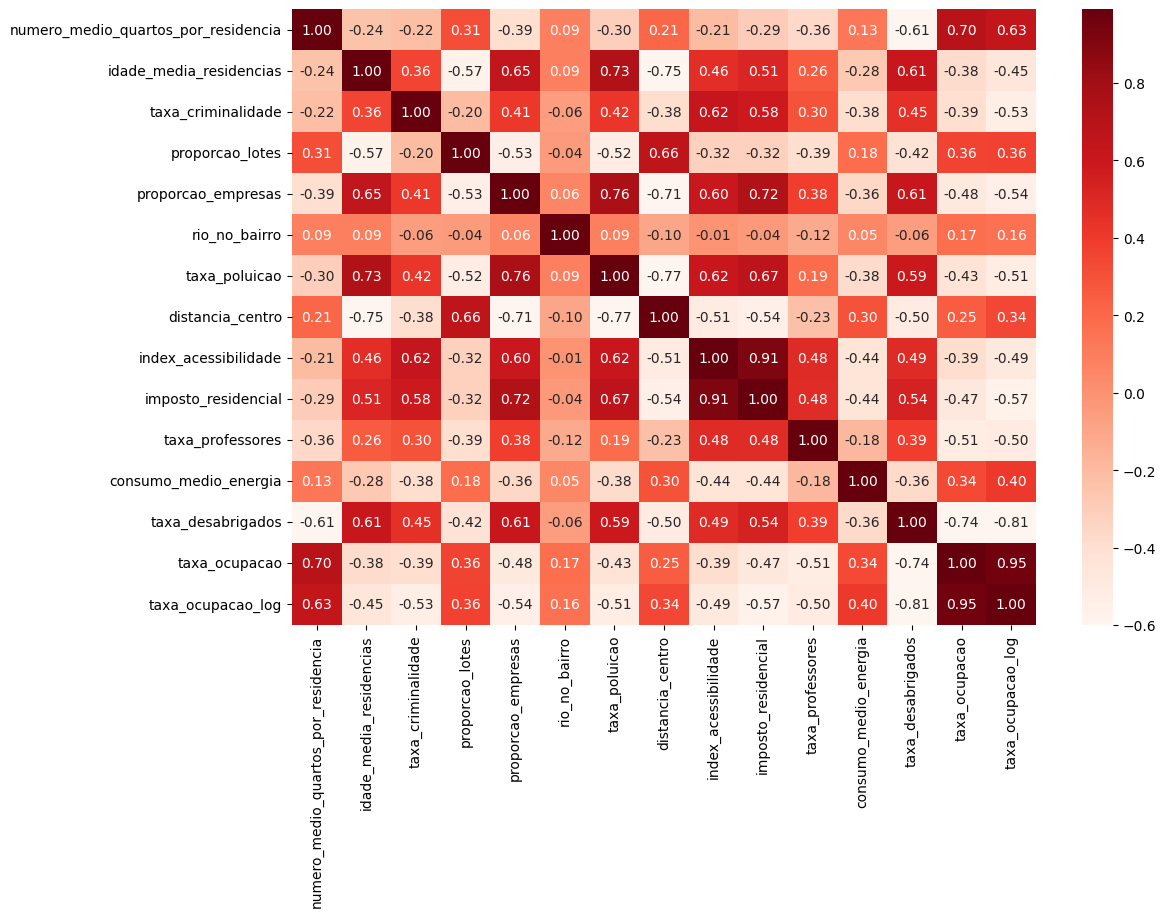

In [24]:
# Tamanho da figura
plt.figure(figsize = (12,8))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
sns.heatmap(dados.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()